# Explore here

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


# Download latest version
data_path1 = "/home/vscode/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1/train.csv"  # Replace with the correct file path
train_data = pd.read_csv(data_path1)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
train_data.shape

(614, 13)

In [46]:
data_path2 = "/home/vscode/.cache/kagglehub/datasets/krishnaraj30/finance-loan-approval-prediction-data/versions/1/test.csv"  # Replace with the correct file path
test_data = pd.read_csv(data_path2)
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
test_data.shape

(367, 12)

In [48]:
# Suponiendo que train_data y test_data son DataFrames de Pandas
total_data = pd.concat([train_data, test_data], ignore_index=True)
total_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
total_data.shape

(981, 13)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pickle

# EDA (ejemplo)
total_data.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [65]:
# EDA Detallado

# 1. Exploración inicial
print(total_data.head())
print(total_data.info())
print(total_data.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0       NaN   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

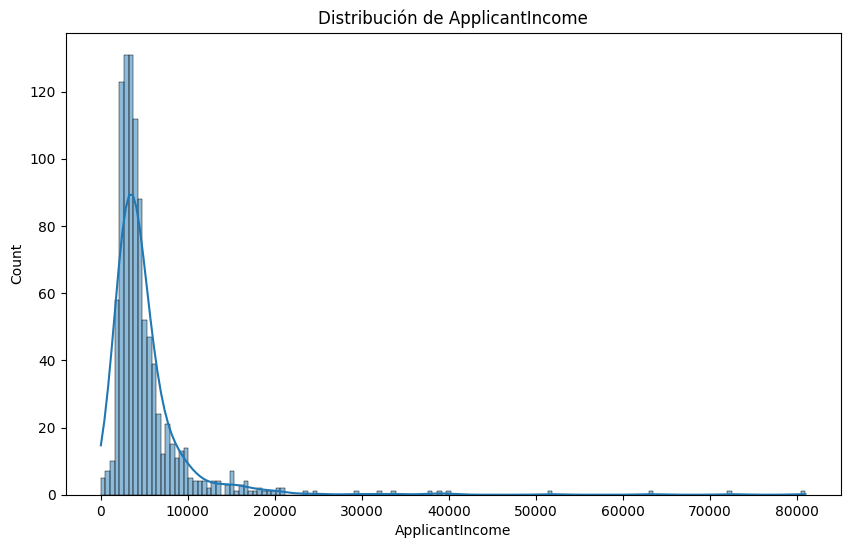

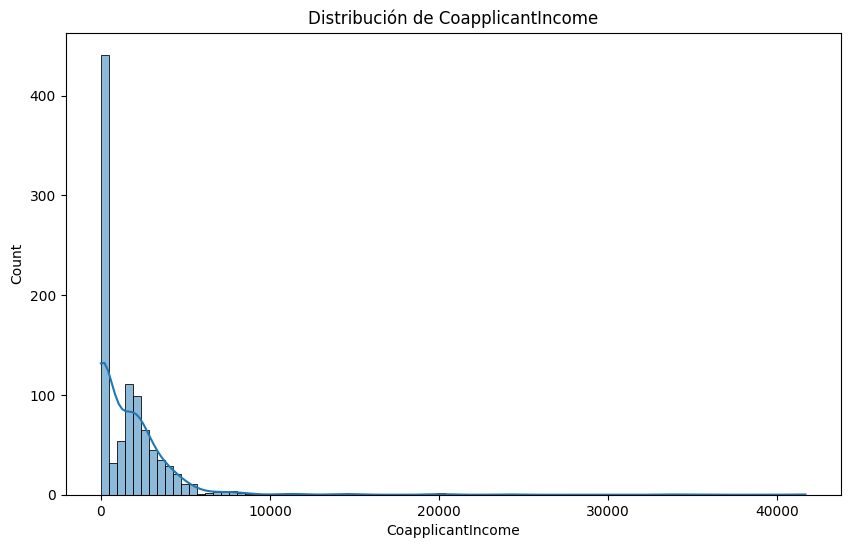

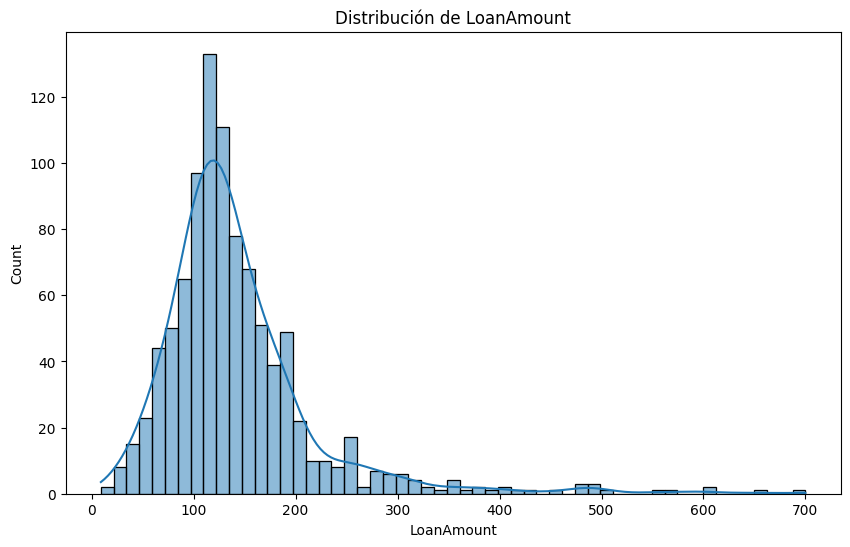

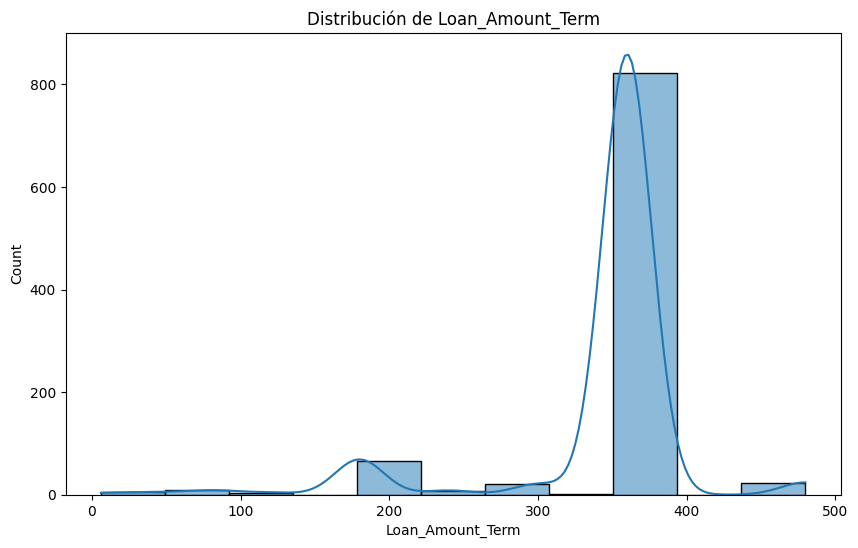

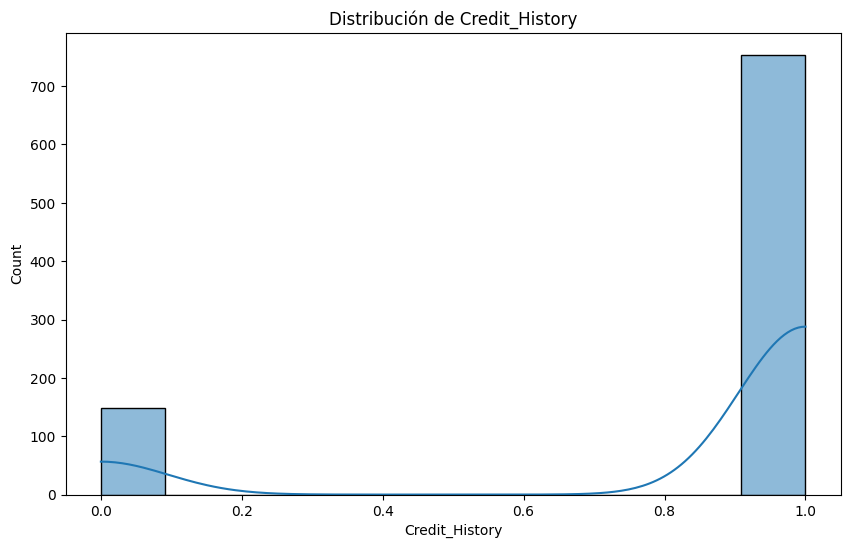

In [66]:
# 2. Visualización de la distribución de variables numéricas
numerical_cols = total_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=total_data, x=col, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()


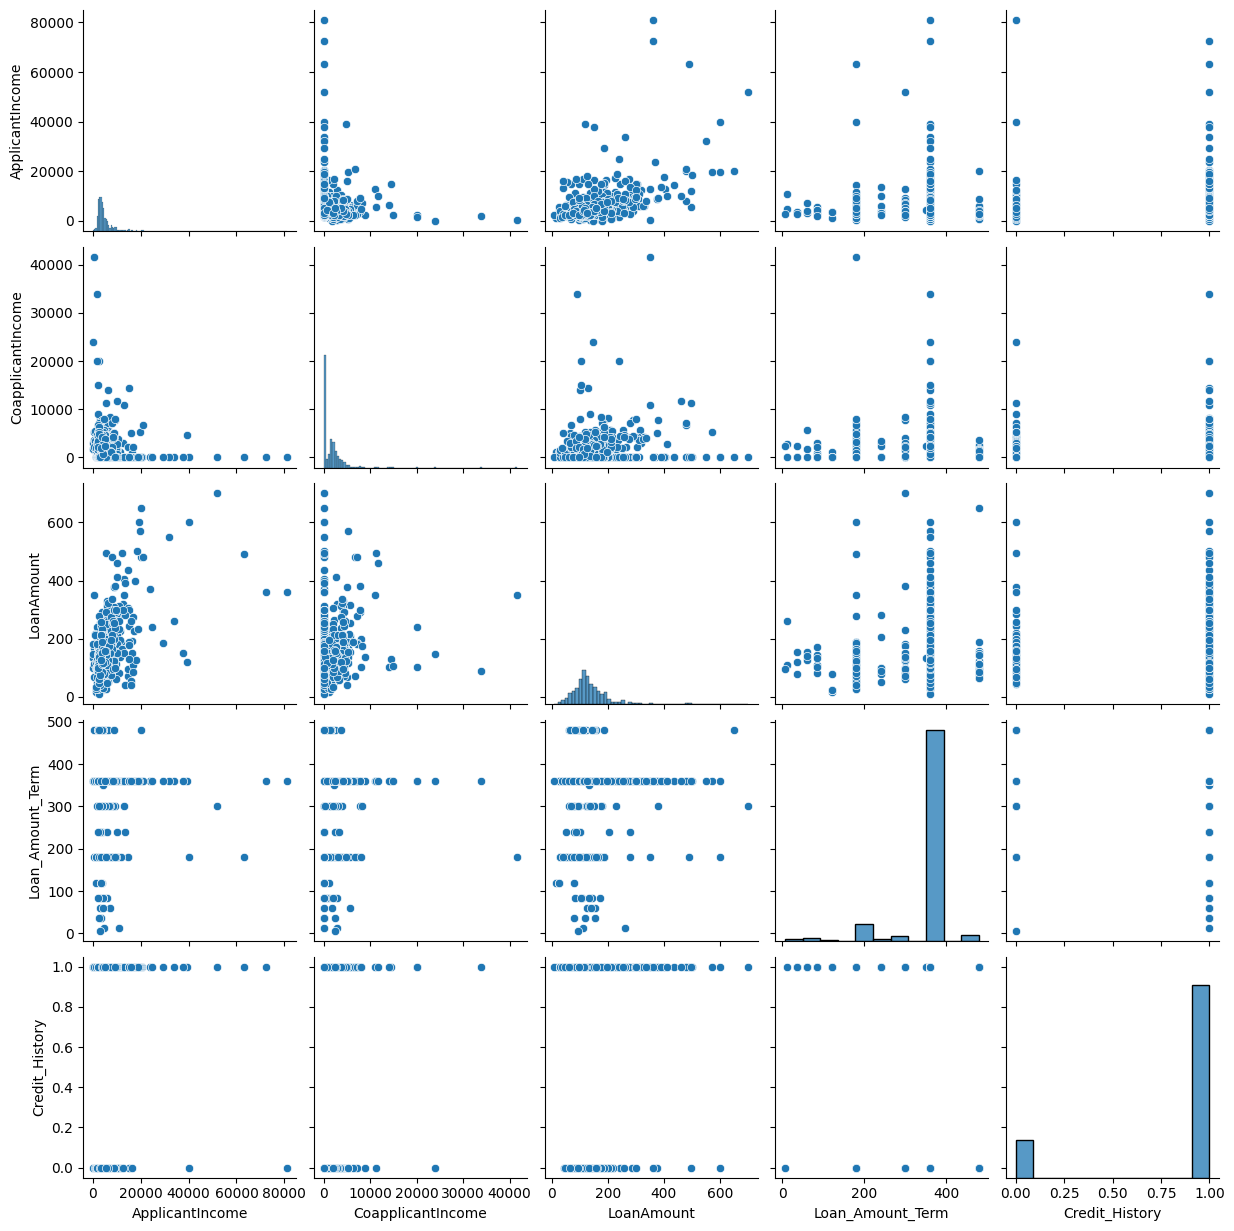

In [67]:
# 3. Visualización de la relación entre variables numéricas
sns.pairplot(total_data[numerical_cols])
plt.show()

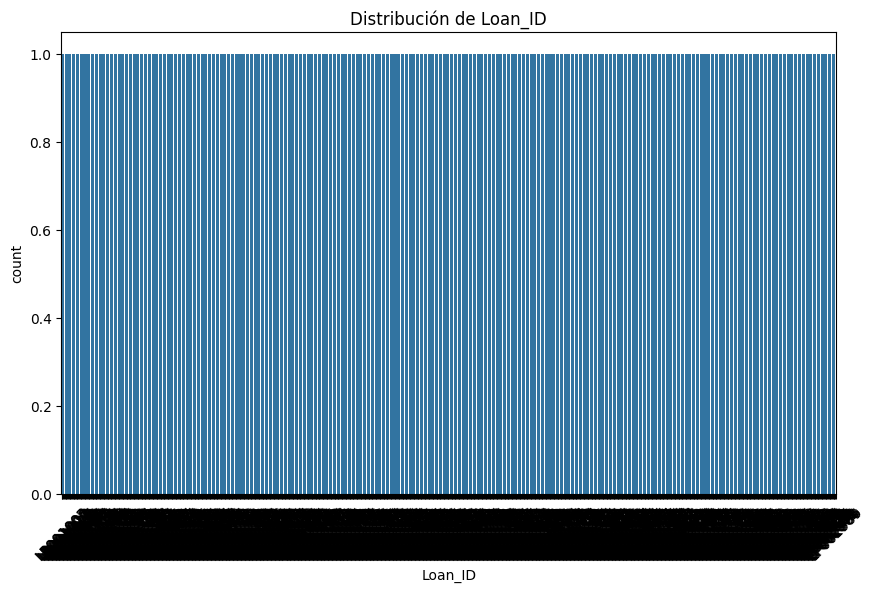

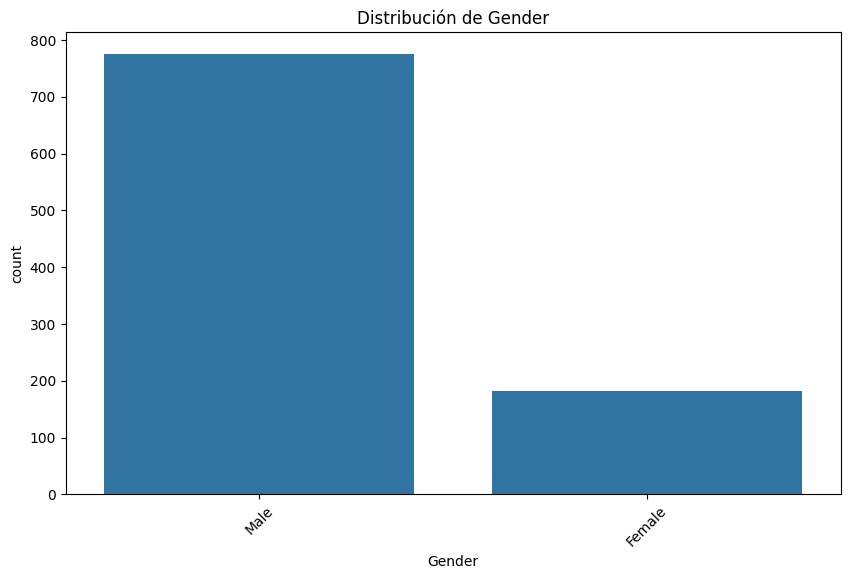

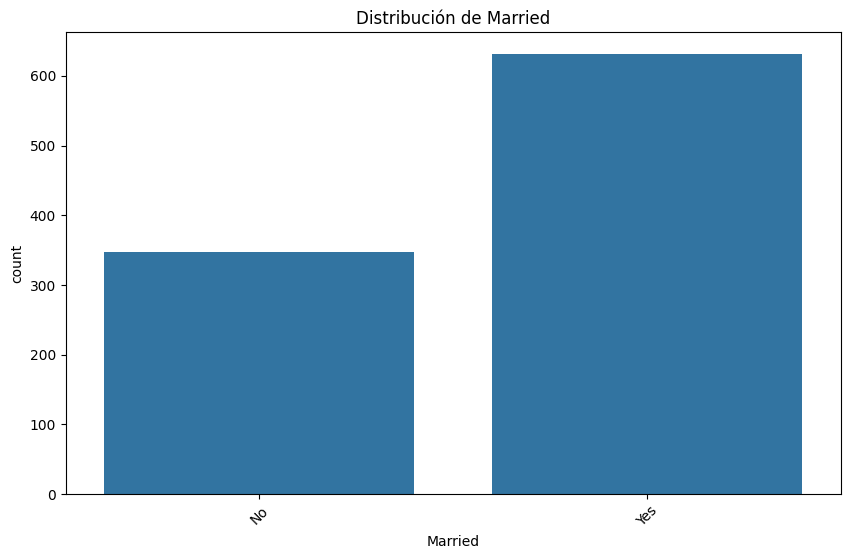

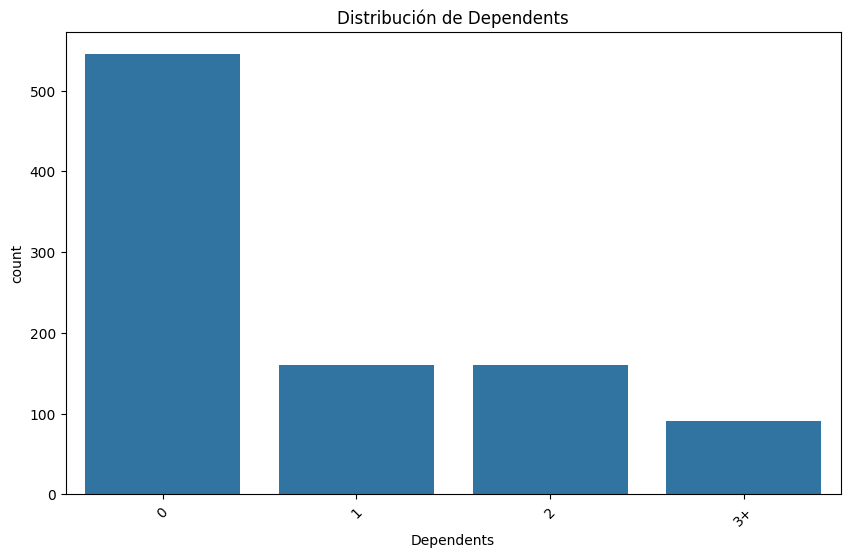

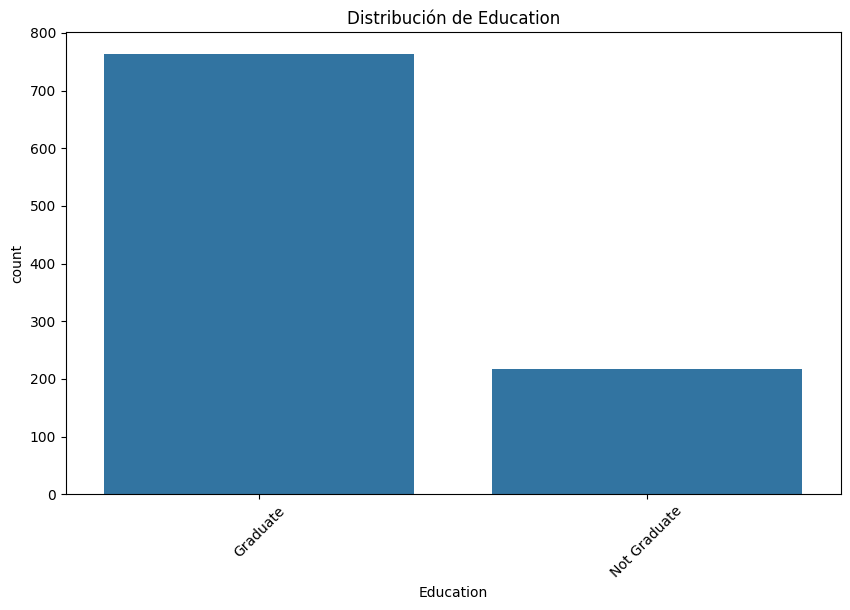

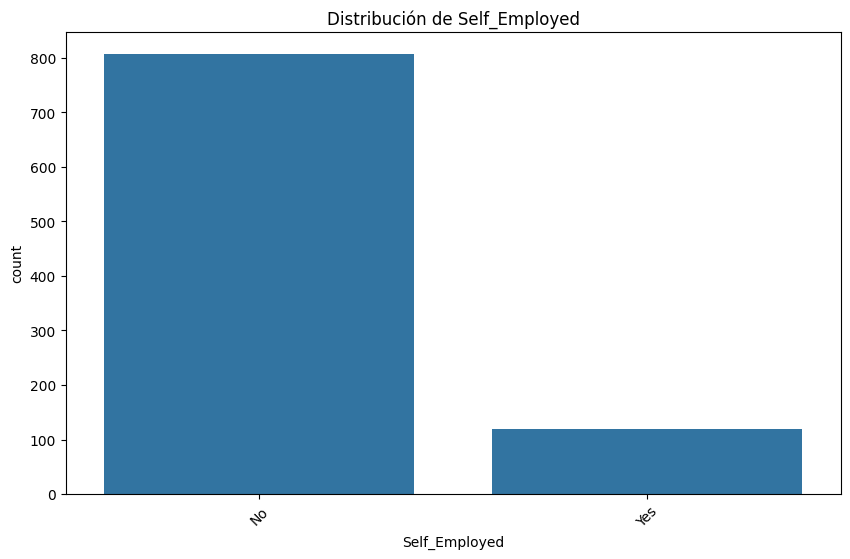

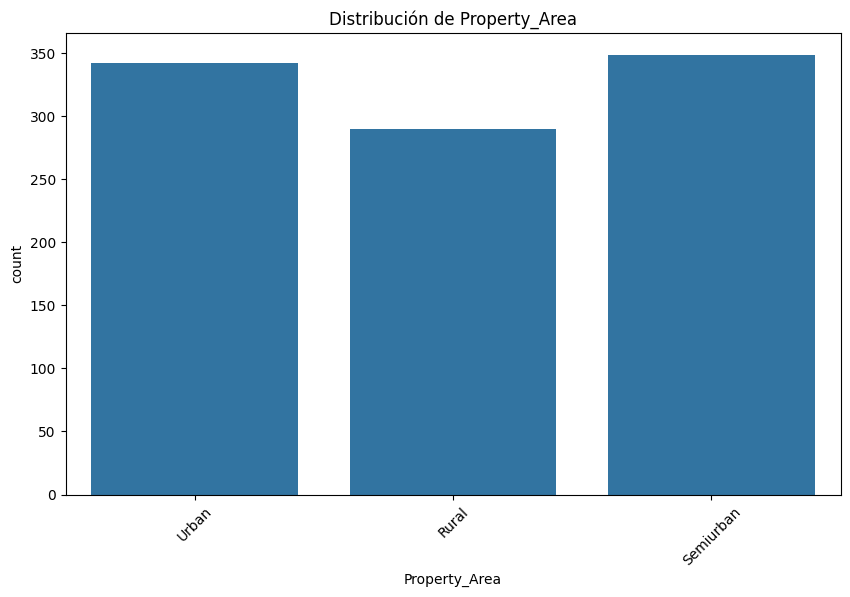

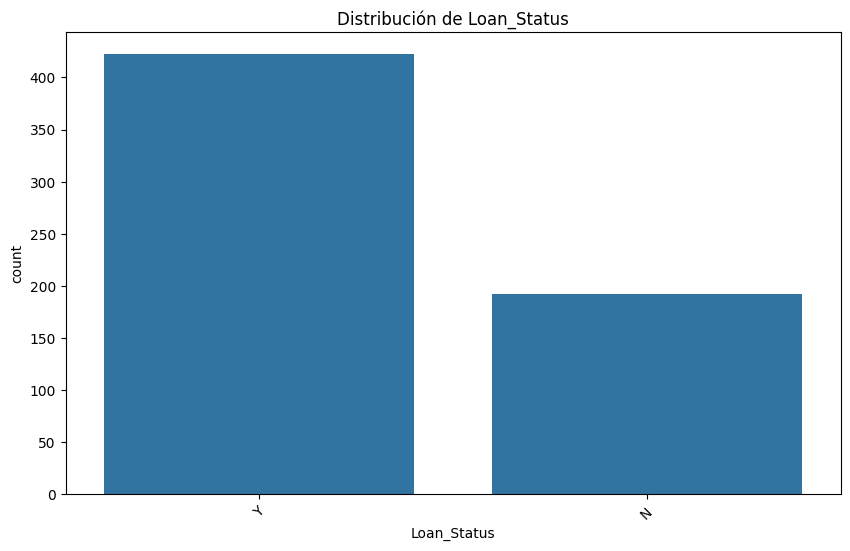

In [68]:
# 4. Visualización de variables categóricas
categorical_cols = total_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=total_data, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

In [69]:
# 5. Identificación de valores faltantes
print(total_data.isnull().sum())
# Aquí puedes decidir cómo tratar los valores faltantes (eliminar filas, imputar, etc.)


Loan_ID                1
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64


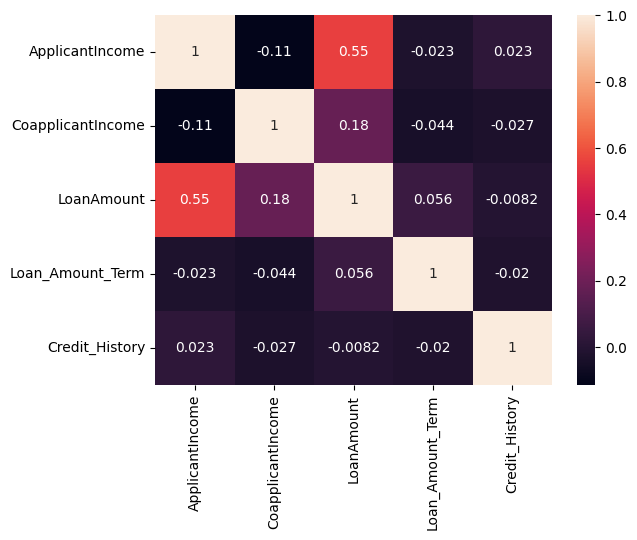

In [71]:

# 6. Identificación de outliers
# Puedes utilizar boxplots o métodos estadísticos como z-scores para detectar outliers

# Select only numerical columns
numerical_cols = total_data.select_dtypes(include=['number']).columns

# Calculate correlation matrix using only numerical columns
corr_matrix = total_data[numerical_cols].corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()